# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [2]:
!pip install -U pip
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 53.3 MB/s  0:00:00


## **Load bioactivity data**

In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

print("RDKit OK")


RDKit OK


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [8]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [9]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
254,436.512,1.47440,3.0,4.0
255,496.583,2.73690,3.0,4.0
256,471.985,2.06450,2.0,4.0
257,465.594,2.19130,2.0,4.0


In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive
...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,52.0,NaN
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,30.0,NaN
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,14.0,NaN
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,48.0,NaN


Now, let's combine the 2 DataFrame

In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,52.0,NaN,436.512,1.47440,3.0,4.0
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,30.0,NaN,496.583,2.73690,3.0,4.0
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,14.0,NaN,471.985,2.06450,2.0,4.0
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,48.0,NaN,465.594,2.19130,2.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [19]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)


    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [20]:
df_combined.standard_value.describe()

,standard_value
count,2.590000e+02
mean,6.526248e+04
std,1.807599e+05
min,1.400000e+01
25%,3.550000e+03
50%,1.400000e+04
75%,4.500000e+04
max,2.000000e+06


In [21]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [22]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [23]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [24]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,436.512,1.47440,3.0,4.0,52.0
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,NaN,496.583,2.73690,3.0,4.0,30.0
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,471.985,2.06450,2.0,4.0,14.0
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,465.594,2.19130,2.0,4.0,48.0


In [25]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2.590000e+02
mean,6.526248e+04
std,1.807599e+05
min,1.400000e+01
25%,3.550000e+03
50%,1.400000e+04
75%,4.500000e+04
max,2.000000e+06


In [26]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,436.512,1.47440,3.0,4.0,7.283997
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,NaN,496.583,2.73690,3.0,4.0,7.522879
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,471.985,2.06450,2.0,4.0,7.853872
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,465.594,2.19130,2.0,4.0,7.318759


In [29]:
df_final.pIC50.describe()

,pIC50
count,259.000000
mean,5.003513
std,1.017000
min,2.698970
25%,4.346787
50%,4.853872
75%,5.449815
max,7.853872


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [31]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,436.512,1.47440,3.0,4.0,7.283997
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,NaN,496.583,2.73690,3.0,4.0,7.522879
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,471.985,2.06450,2.0,4.0,7.853872
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,465.594,2.19130,2.0,4.0,7.318759


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [32]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

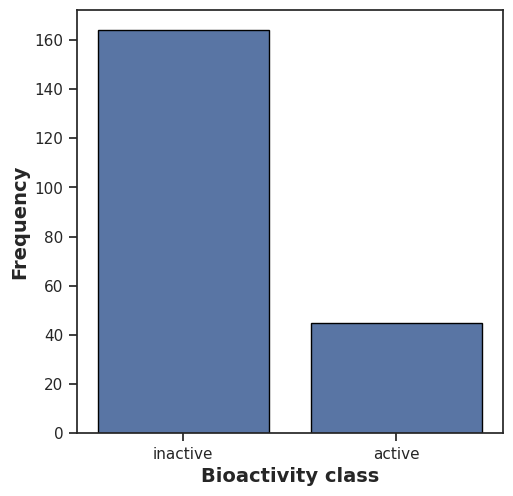

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

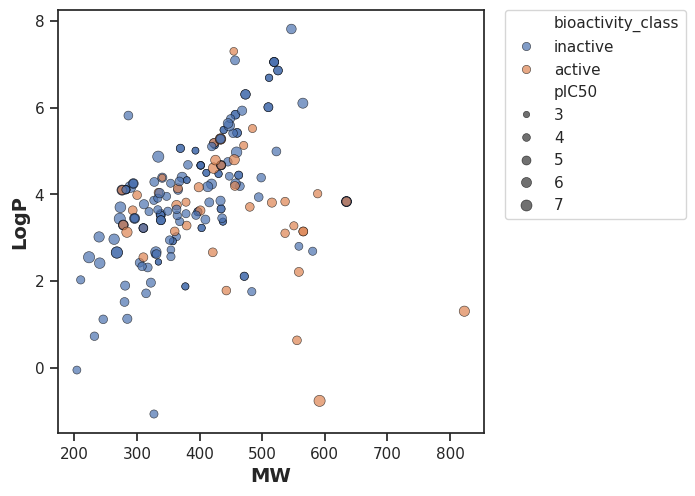

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

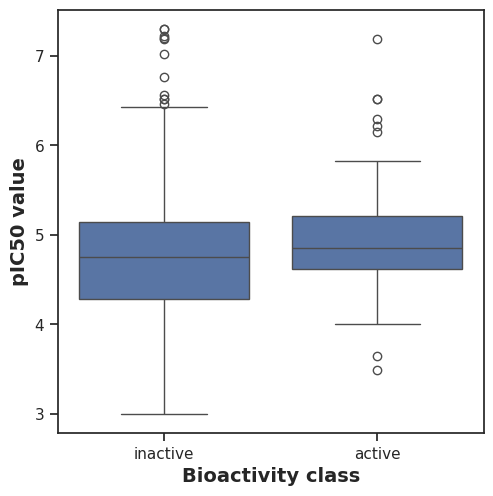

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [36]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [37]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4305.5,0.086951,0.05,Same distribution (fail to reject H0)


#### **MW**

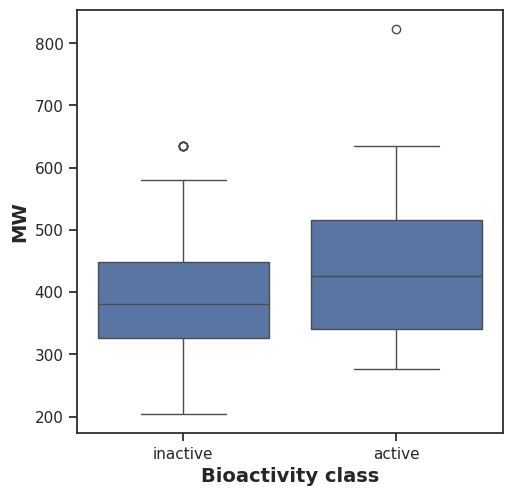

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [39]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4415.5,0.043642,0.05,Different distribution (reject H0)


#### **LogP**

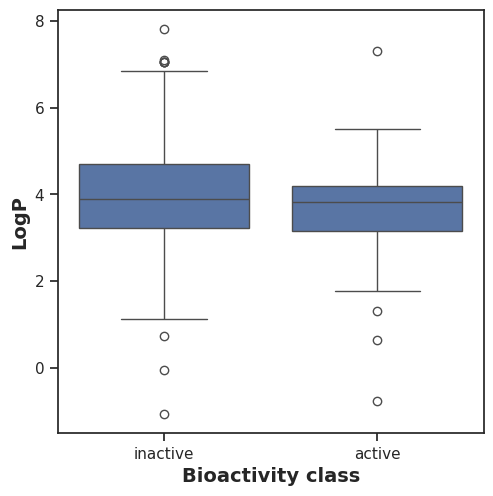

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [41]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3293.0,0.269867,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

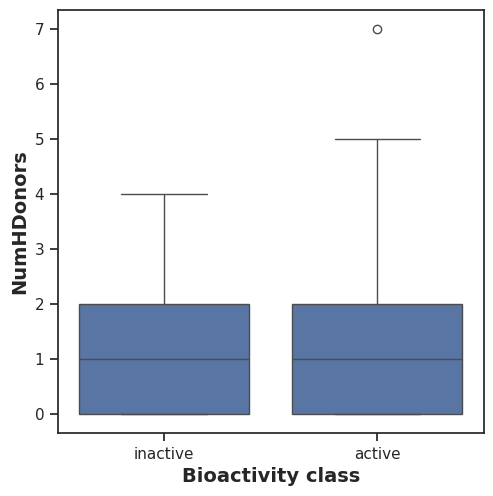

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [43]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4065.0,0.274823,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

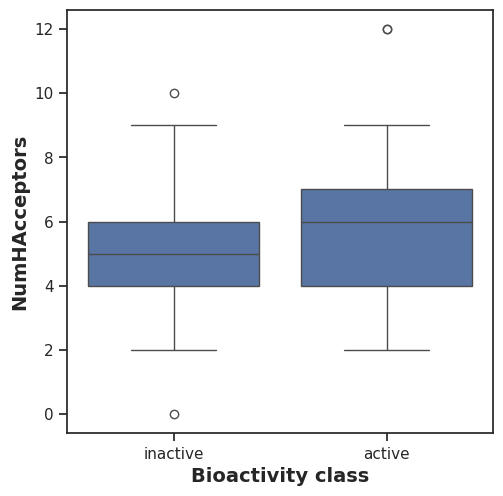

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [45]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4032.0,0.335468,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [46]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: bioactivity_data_preprocessed.csv (deflated 81%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 11%)
